In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qucat import GUI

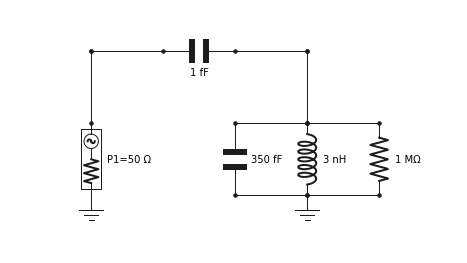

In [2]:
refl = GUI('reflection_harmonic_oscillator.txt',edit = False, plot = True)

In [3]:
# Get resonance frequency and dissipation
# rate of the circuit
freq = refl.eigenfrequencies()
diss = refl.loss_rates()

In [4]:
# Compute S11
drive_freqs = np.linspace(freq[0]-3*diss[0],freq[0]+3*diss[0],101)
S11 = refl.S('P1','P1',drive_frequencies = drive_freqs,drive_power = -150)

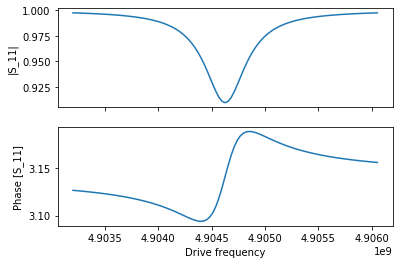

In [5]:
# Plot the magnitude and phase of S11
fig,axes = plt.subplots(2,1,sharex=True)
axes[0].plot(drive_freqs,np.absolute(S11))
axes[1].plot(drive_freqs,np.unwrap(np.angle(S11)))
axes[1].set_xlabel('Drive frequency')
axes[0].set_ylabel('|S_11|')
axes[1].set_ylabel('Phase [S_11]')
plt.show()

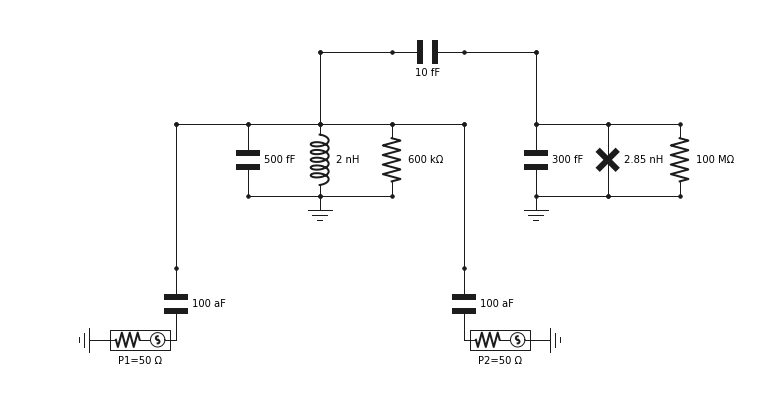

In [24]:
trans = GUI('transmission_cQED.txt',edit = True, plot = True)

In [25]:
f,k,A,chi = trans.f_k_A_chi(pretty_print=True)

         mode |       freq.  |       diss.  |       anha.  |
            0 |     4.97 GHz |      504 kHz |     41.9 kHz |
            1 |     5.37 GHz |     21.9 kHz |     59.3 MHz |

Kerr coefficients (diagonal = Kerr, off-diagonal = cross-Kerr)
         mode |         0    |         1    |
            0 |     41.9 kHz |              |
            1 |     3.15 MHz |     59.3 MHz |



In [26]:
f_pert = f[0]-A[0]-chi[0][1]/2
drive_freqs = np.linspace(f_pert-3*k[0]-5*chi[0][1],f_pert+3*k[0],301)
S21 = trans.S('P1','P2',
              drive_frequencies = drive_freqs,
              drive_power = -200,
              taylor=4,
              excitations = [3,6],
              temperature = [0,1],
              temperature_unit = 'photon'
             )

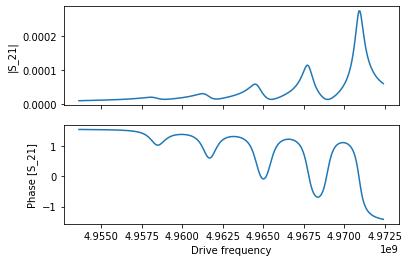

In [27]:
# Plot the magnitude and phase of S21
fig,axes = plt.subplots(2,1,sharex=True)
axes[0].plot(drive_freqs,np.absolute(S21))
axes[1].plot(drive_freqs,np.unwrap(np.angle(S21)))
axes[1].set_xlabel('Drive frequency')
axes[0].set_ylabel('|S_21|')
axes[1].set_ylabel('Phase [S_21]')
plt.show()